### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [49]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m,"\n")
row = np.mean(m,1)
print("Row mean: ", row)
col = np.mean(m,0)
print("column mean: ", col)
mean = np.mean(m)
print("Overall mean: ", mean)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

Row mean:  [1.5 5.5 9.5]
column mean:  [4. 5. 6. 7.]
Overall mean:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [15]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#sol with outer function
sol_1 = np.outer(u, v)
print("Solution with outer function:\n",sol_1, "\n")

#sol with for loop
sol_2 = np.eye(4)
for i in range(len(u)):
    for j in range(len(v)):
        sol_2[i,j] = u[i]*v[j]
print("Solution with for loop:\n",sol_2, "\n")

#sol with broadcasting
sol_3 = u[:, np.newaxis]*v
print("Solution with broadcasting:\n",sol_3, "\n")

Solution with outer function:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

Solution with for loop:
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]] 

Solution with broadcasting:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 



3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [16]:
A = np.random.rand(10,6) 
A


array([[6.24457297e-01, 1.96617854e-01, 2.72028936e-01, 3.62139836e-01,
        2.03845609e-01, 4.43487623e-01],
       [6.35437526e-01, 1.84253671e-01, 3.18725597e-01, 9.63606136e-01,
        2.36611890e-01, 7.13600488e-01],
       [8.00163425e-04, 1.21361599e-02, 8.58136630e-01, 9.13790659e-01,
        6.64980789e-01, 8.91965871e-01],
       [2.53440782e-01, 4.11021553e-01, 7.19867521e-01, 1.37640426e-01,
        9.83602966e-02, 8.14843516e-01],
       [1.91177815e-01, 6.16009957e-02, 2.20720566e-01, 8.41107364e-01,
        9.31060887e-02, 1.20939573e-01],
       [7.00132967e-01, 5.22091788e-01, 1.36033234e-01, 9.57647913e-01,
        4.63235691e-01, 1.55348965e-01],
       [4.73311483e-01, 2.47798051e-01, 9.63657893e-01, 9.84078545e-01,
        1.42648048e-01, 8.10611419e-01],
       [8.16511531e-01, 4.07100735e-01, 6.17105088e-01, 5.30352918e-01,
        2.34695941e-03, 9.97050660e-01],
       [6.04532250e-01, 8.25850371e-01, 5.40856588e-01, 4.67814322e-01,
        9.80265478e-01, 

In [17]:
A[A < 0.1] = 0.0
A

array([[0.6244573 , 0.19661785, 0.27202894, 0.36213984, 0.20384561,
        0.44348762],
       [0.63543753, 0.18425367, 0.3187256 , 0.96360614, 0.23661189,
        0.71360049],
       [0.        , 0.        , 0.85813663, 0.91379066, 0.66498079,
        0.89196587],
       [0.25344078, 0.41102155, 0.71986752, 0.13764043, 0.        ,
        0.81484352],
       [0.19117781, 0.        , 0.22072057, 0.84110736, 0.        ,
        0.12093957],
       [0.70013297, 0.52209179, 0.13603323, 0.95764791, 0.46323569,
        0.15534897],
       [0.47331148, 0.24779805, 0.96365789, 0.98407854, 0.14264805,
        0.81061142],
       [0.81651153, 0.40710074, 0.61710509, 0.53035292, 0.        ,
        0.99705066],
       [0.60453225, 0.82585037, 0.54085659, 0.46781432, 0.98026548,
        0.        ],
       [0.27856813, 0.13650665, 0.40491172, 0.47664346, 0.40399361,
        0.        ]])

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

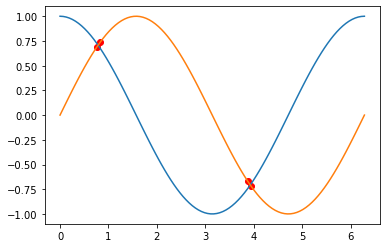

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline 

x = np.linspace(0, 2 * np.pi, 100)

#a
ten = x[::10]

#b
rev_x = x[::-1]

#c
sinx =  np.sin(x)
cosx =  np.cos(x)
close = x[np.abs(sinx-cosx) < 0.1]

#d
plt.plot(x, cosx);
plt.plot(x, sinx);
plt.scatter(close, np.sin(close), color='red')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [19]:
def mult_table(n):
    rng = np.arange(1, n+1)
    return rng * rng[:, None]
M = mult_table(10)
print(M)


tr = np.trace(M)
print("Trace: ",tr)

def anti_diagonal(arr):
    return np.fliplr(arr).diagonal()

print("Anti-diagonal: ",anti_diagonal(M))
print("Diagnoal offset by 1 upwards: ", np.diag(M, 1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace:  385
Anti-diagonal:  [10 18 24 28 30 30 28 24 18 10]
Diagnoal offset by 1 upwards:  [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [20]:
positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances = abs(positions [:, np.newaxis] - positions)
print("Grid of distances (MILES): \n",distances)
print("\n")
distances = distances*1.60934
print("Grid of distances (KM): \n", distances)

Grid of distances (MILES): 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]


Grid of distances (KM): 
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [47]:
def sieve(N):
    num = np.arange(0,N+1)
    mask = np.full(N+1, False, dtype=bool)

    def is_prime(num):
        if num == 2:
            return True   
        for n in range(2, num-1):
            if num % n == 0:
                return False
        return True
prime = [i for i in range(len(num)) if is_prime(i) == True]


for j in range(2,len(index)):
    for i in range(2,100):
        if index[j] == num[i]:
            mask[i]=True

print(num[mask])

def Eratosthenes_sieve(n):
    A = np.ones(n, dtype=bool)
    A[0] = A[1] = False
    for i in range(2, n):
        if A[i]:
            A[i*i::i] = False
    return np.flatnonzero(A)
print(Eratosthenes_sieve(99))        

%timeit sieve(99)
%timeit Eratosthenes_sieve(99)

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
2.65 µs ± 60.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
23.8 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[ 1 -1 -1 ...  1  1 -1]
 [-1 -1  1 ... -1  1  1]
 [ 1 -1  1 ... -1 -1 -1]
 ...
 [ 1  1 -1 ...  1  1  1]
 [-1  1 -1 ...  1  1 -1]
 [-1 -1 -1 ... -1 -1  1]]



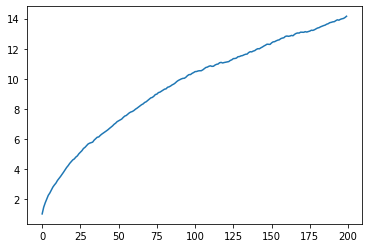

In [22]:
from math import sqrt

n_w = 1000
steps = 200

M = np.random.randint(-1, 1, size = (n_w, steps))
M[M == 0] = 1
print(M)

w_dist = np.cumsum(M, axis = 1)
dist = w_dist**2
mean_dist = np.mean(dist, axis = 0)

plt.plot(np.arange(steps),np.sqrt(mean_dist))
print('')

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

HARE
 Mean:  34080.95238095238 
 Std:  20897.906458089667 

LYNX
 Mean:  20166.666666666668 
 Std:  16254.591536908763 

CARROT
 Mean:  42400.0 
 Std:  3322.5062255844787 

CORRELATION FACTOR 

Hare/Lynx:
  0.07189206073535571 

Hare/Carrot:
  -0.016603777709879402 

Lynx/Carrot:
  -0.6805771698401617 



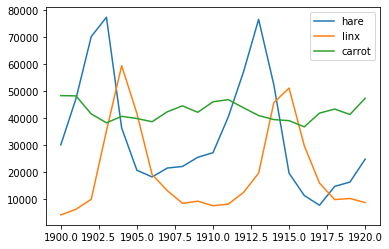

In [23]:
data = np.genfromtxt("populations.txt")

year = np.zeros(len(data))
hare = np.zeros(len(data))
lynx = np.zeros(len(data))
carrot = np.zeros(len(data))

for i in range(0,len(data),1):
    year[i] = data[i][0]
    hare[i] = data[i][1]
    lynx[i] = data[i][2]
    carrot[i] = data[i][3]

plt.plot(year, hare, label='hare');
plt.plot(year, lynx, label='linx');
plt.plot(year, carrot, label='carrot');
plt.legend()

names=["hare", "lynx", "carrot"]

def mean(vec):
    m = np.mean(vec, dtype=np.float64)
    return m
def std(vec):
    std = np.std(vec, dtype=np.float64)
    return std
def correlation(a,b):
    cor = np.corrcoef(a,b)[0,1]
    return cor

print("HARE\n","Mean: ",mean(hare),"\n", "Std: ", std(hare),"\n")
print("LYNX\n","Mean: ",mean(lynx),"\n", "Std: ", std(lynx),"\n")
print("CARROT\n","Mean: ",mean(carrot),"\n", "Std: ", std(carrot),"\n")
print("CORRELATION FACTOR \n")
print("Hare/Lynx:\n ", correlation(hare, lynx),"\n")
print("Hare/Carrot:\n ", correlation(hare, carrot),"\n")
print("Lynx/Carrot:\n ", correlation(lynx, carrot),"\n")

